Description: https://www.youtube.com/watch?v=c_WbKfyt8pY

In [1]:
import cv2
import torch
import matplotlib.pyplot as plt

# Download the Midas

In [2]:
#there are different sizes of Midas to use
midas = torch.hub.load('intel-isl/MiDaS', 'MiDaS_small')
midas.to('cpu')
midas.eval()

Using cache found in /Users/emeronmarcelle/.cache/torch/hub/intel-isl_MiDaS_master
/opt/anaconda3/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


Using cache found in /Users/emeronmarcelle/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

# Input transformation pipeline

In [3]:
transforms = torch.hub.load('intel-isl/MiDaS', 'transforms')
transform = transforms.small_transform

Using cache found in /Users/emeronmarcelle/.cache/torch/hub/intel-isl_MiDaS_master


# Hook into OpenCV

2024-11-01 18:17:56.855 python[17422:1763220] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


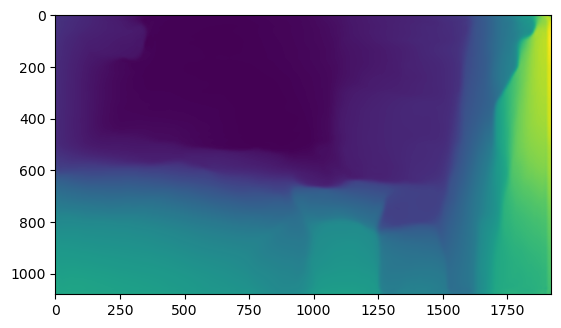

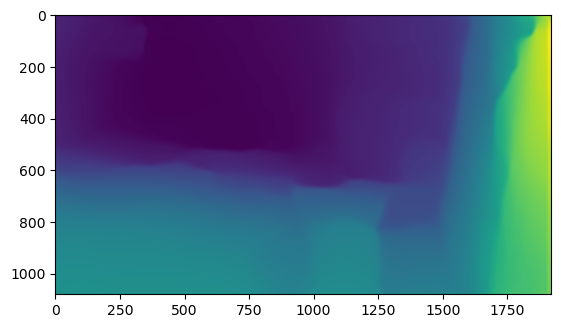

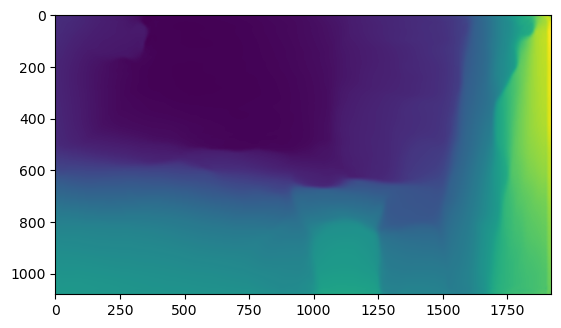

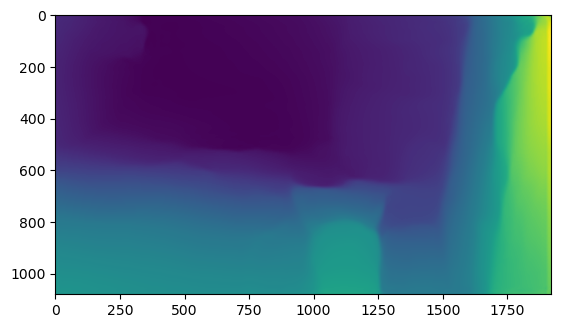

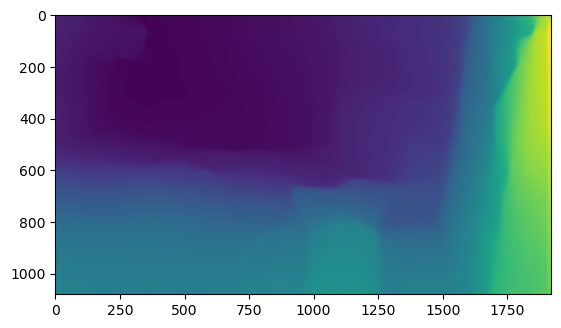

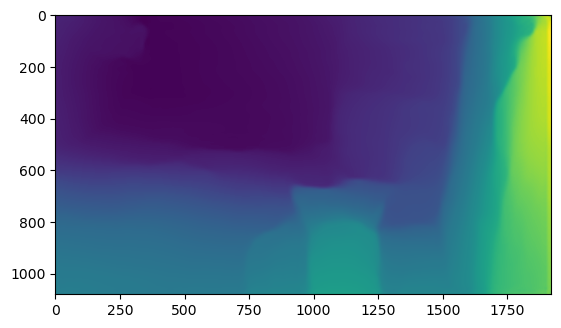

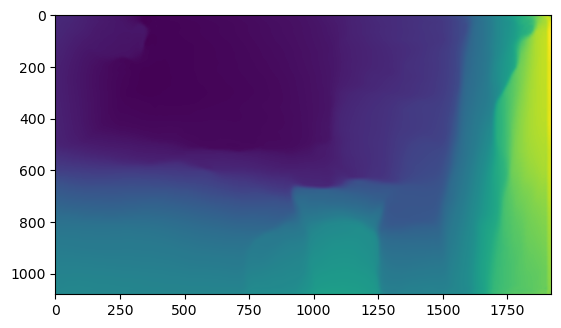

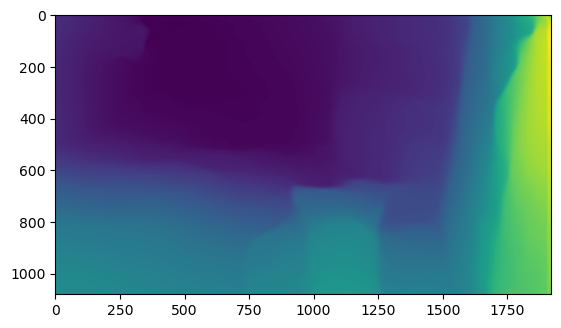

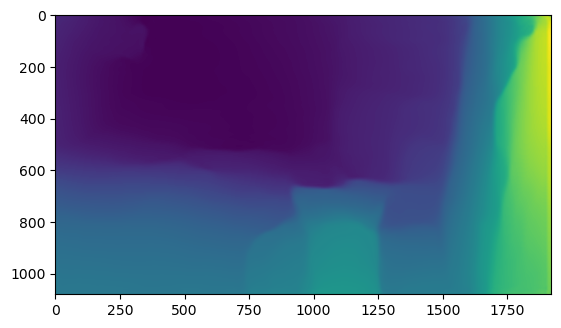

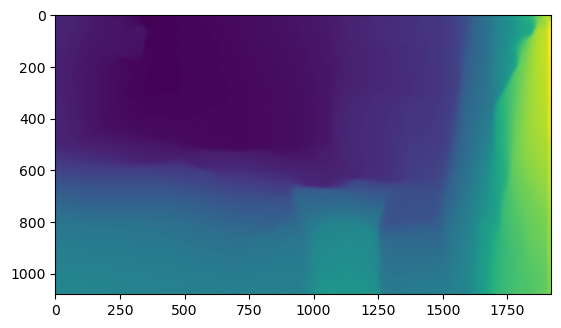

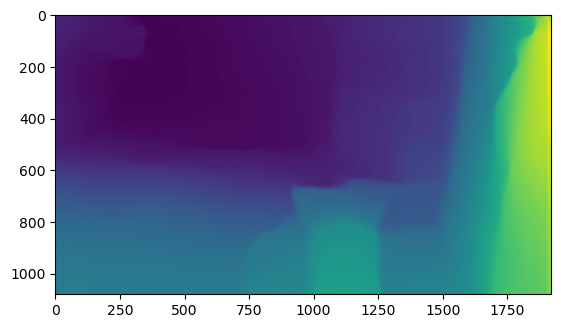

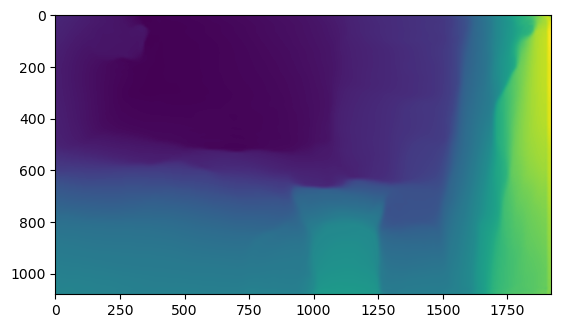

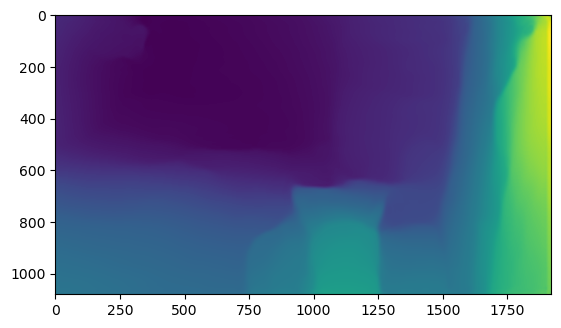

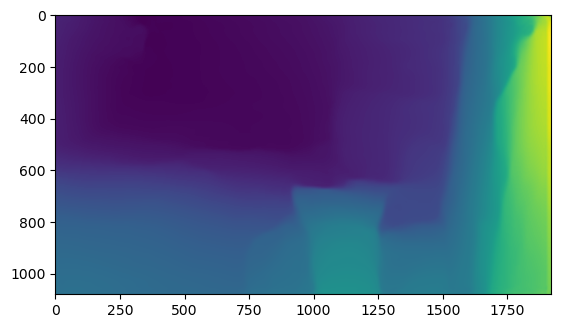

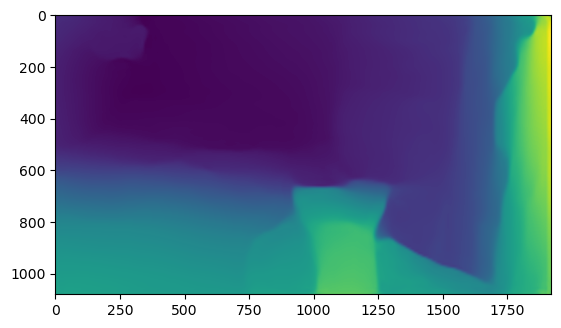

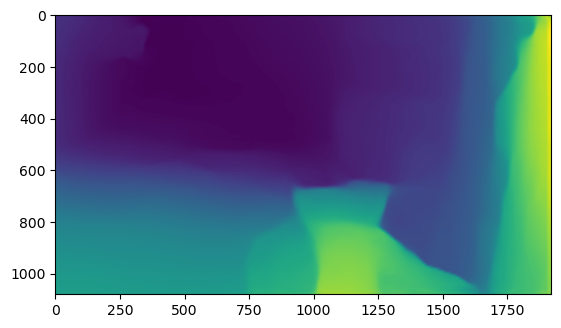

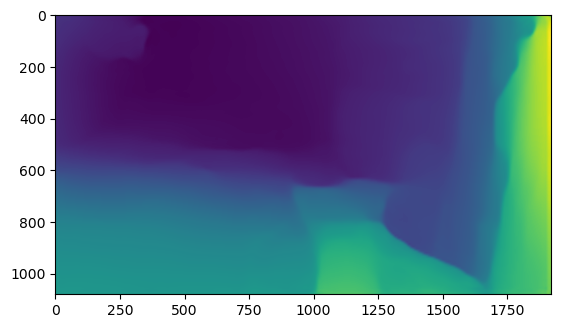

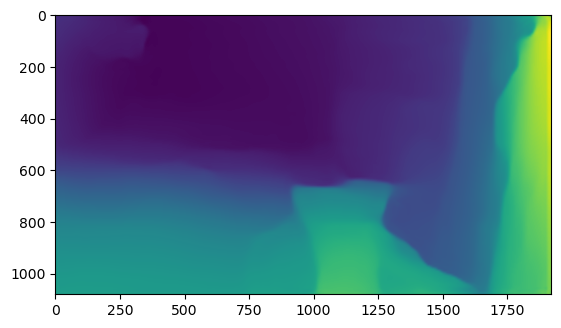

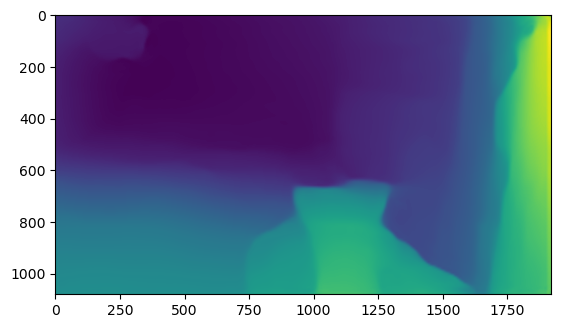

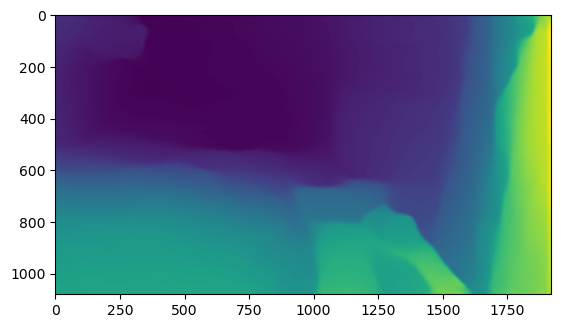

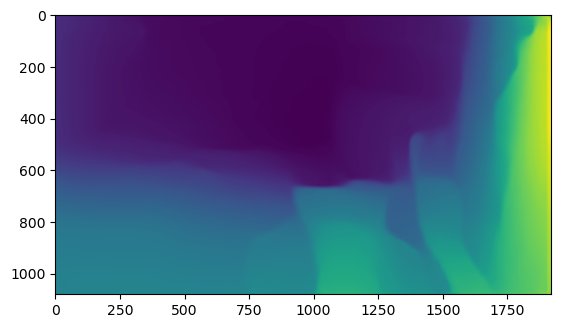

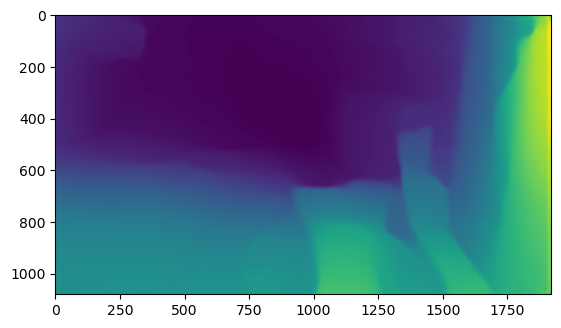

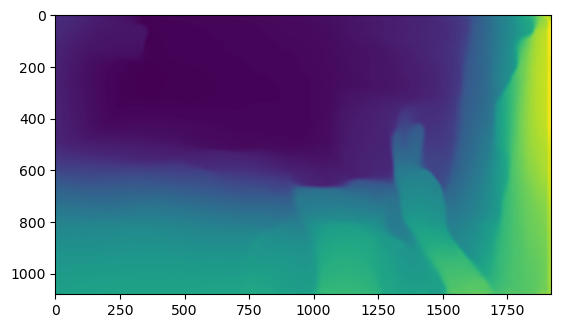

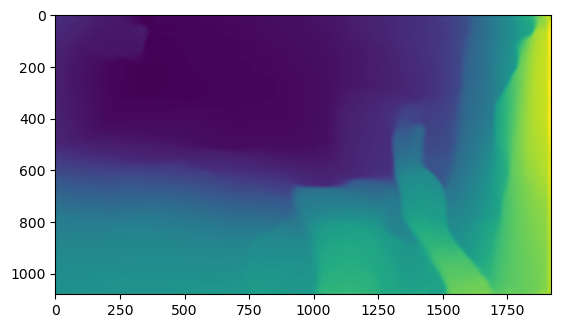

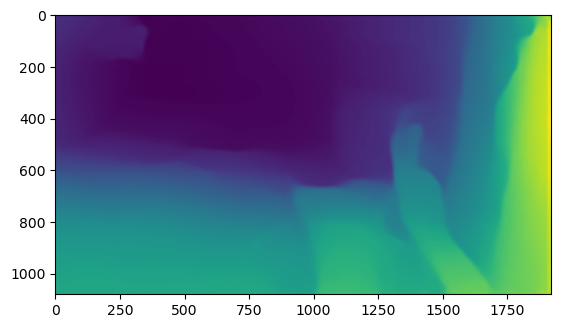

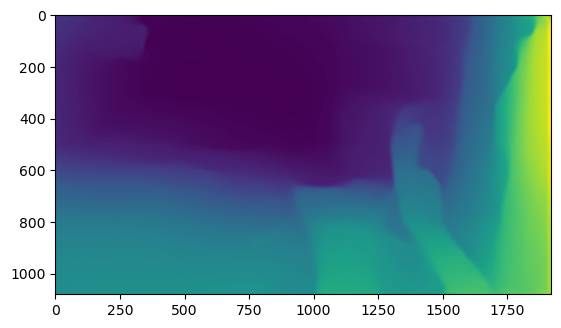

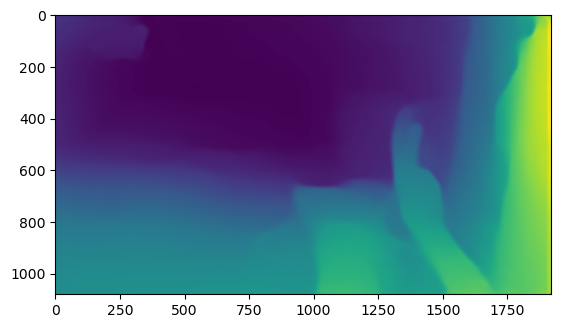

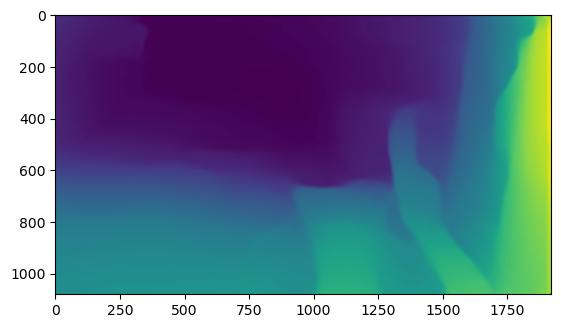

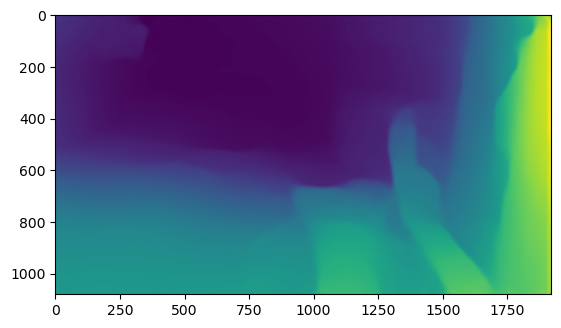

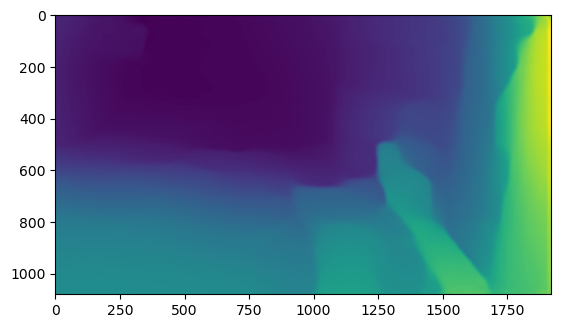

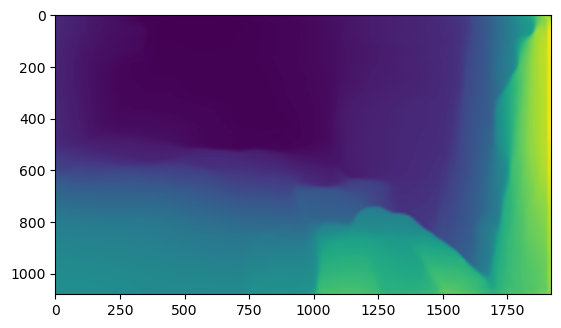

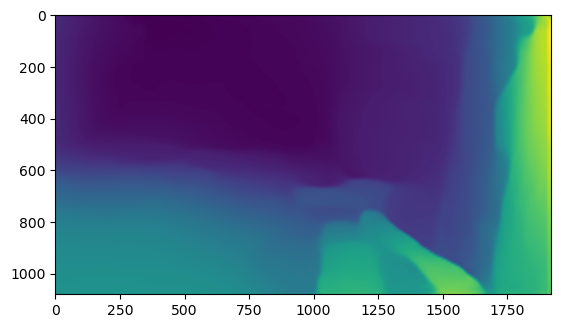

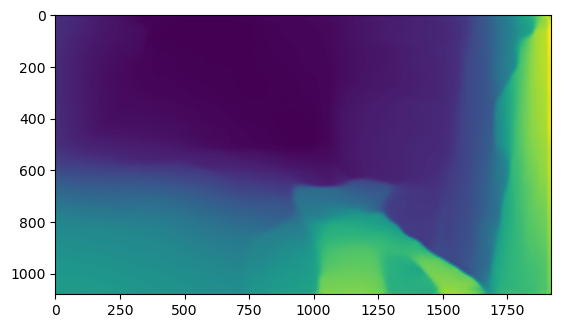

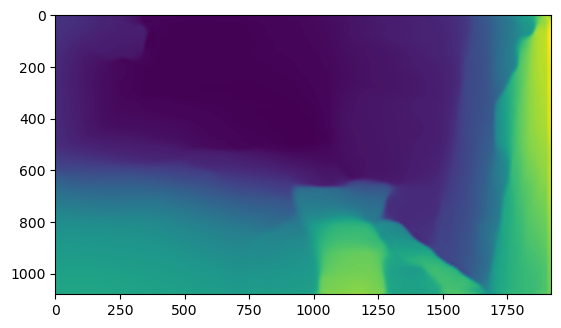

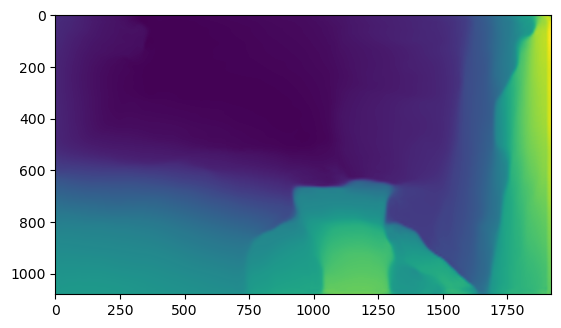

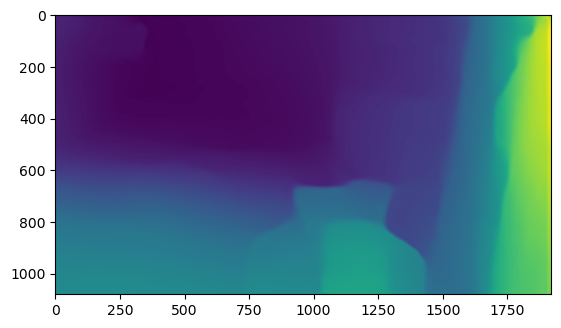

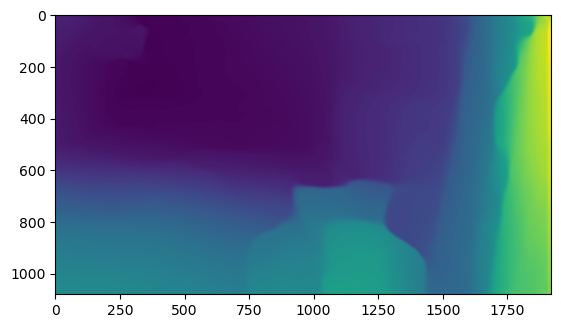

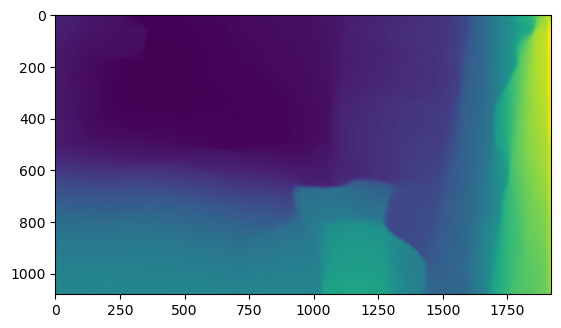

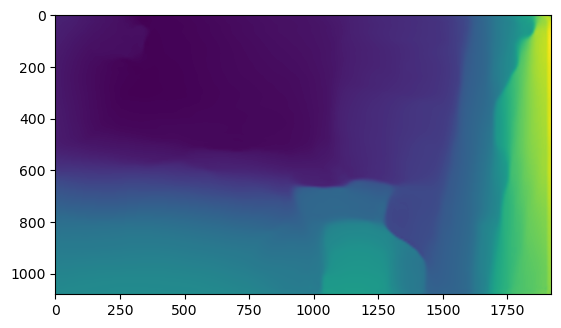

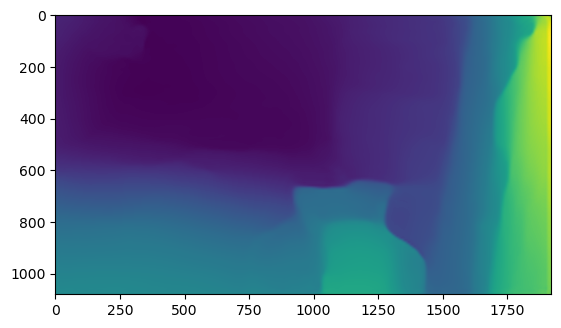

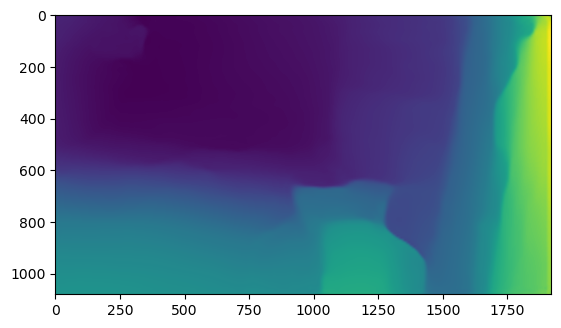

NameError: name 'cap' is not defined

In [4]:
capture = cv2.VideoCapture(0)
while capture.isOpened():
    ret, frame = capture.read()
    
    #transform input for midas
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    imgbatch = transform(img).to('cpu')
    
    with torch.no_grad():
        prediction = midas(imgbatch)
        prediction = torch.nn.functional.interpolate(prediction.unsqueeze(1), size = img.shape[:2],
                                                    mode = 'bicubic', align_corners=False).squeeze()
        output = prediction.cpu().numpy()
        #print(output)
    
    plt.imshow(output)
    cv2.imshow('CV2Frame', frame)
    plt.pause(0.00001)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()

plt.show()

In [5]:
q

NameError: name 'q' is not defined